In [1]:
%reload_ext autoreload
%autoreload 2

# Static potential

In [2]:

#!/usr/bin/env python
# -*- coding:utf-8 -*-
#
# Created: 06/2023
# Author: Carmelo Mordini <cmordini@phys.ethz.ch>


import numpy as np
from pytrans import objectives as obj
from pytrans.conversion import freq_to_curv
from pytrans.ions import Ca40
from pytrans.functions import zpspace
from pytrans.solver import solver, init_waveform

from models.segmented_trap import SegmentedTrap

from pathlib import Path
data_dir = Path('.').resolve() / 'data'

trap = SegmentedTrap()

axial = freq_to_curv(1e6, ion=Ca40)
rtilt = 2e7

n_samples = 1
r0 = (0, 0, trap.z0)
ion = Ca40

waveform = init_waveform(n_samples, trap.n_electrodes)

objectives = [
    obj.GradientObjective(waveform[0], trap, *r0, value=0, ion=Ca40),
    obj.HessianObjective(waveform[0], trap, *r0, entries='xx', value=axial, ion=Ca40),
    obj.HessianObjective(waveform[0], trap, *r0, entries='yz', value=rtilt, ion=Ca40),
]


objectives += [
    obj.VoltageObjective(waveform, 0),  # minimize voltages
    obj.VoltageObjective(waveform, 10, constraint_type='<='),
    obj.VoltageObjective(waveform, -10, constraint_type='>='),
]

solver_results = solver(objectives, verbose=True)
waveform = solver_results.waveform.value  # get array from cvxpy variable

savename = data_dir / 'waveform_static_segmented_trap.npy'
print(f"Saving waveform as ndarray to {savename}")
np.save(savename, waveform)


Compiling objectives: 100%|██████████| 6/6 [00:00<00:00, 428.66it/s]

                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Aug 22 02:34:41 PM: Your problem has 6 variables, 2 constraints, and 0 parameters.
(CVXPY) Aug 22 02:34:41 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 22 02:34:41 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 22 02:34:41 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 22 02:34:41 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Aug 22 02:34:41 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing ->

(CVXPY) Aug 22 02:34:41 PM:   Name                   :                 
(CVXPY) Aug 22 02:34:41 PM:   Objective sense        : max             
(CVXPY) Aug 22 02:34:41 PM:   Type                   : CONIC (conic optimization problem)
(CVXPY) Aug 22 02:34:41 PM:   Constraints            : 10              
(CVXPY) Aug 22 02:34:41 PM:   Cones                  : 4               
(CVXPY) Aug 22 02:34:41 PM:   Scalar variables       : 31              
(CVXPY) Aug 22 02:34:41 PM:   Matrix variables       : 0               
(CVXPY) Aug 22 02:34:41 PM:   Integer variables      : 0               
(CVXPY) Aug 22 02:34:41 PM: 
(CVXPY) Aug 22 02:34:41 PM: Optimizer started.
(CVXPY) Aug 22 02:34:41 PM: Presolve started.
(CVXPY) Aug 22 02:34:41 PM: Linear dependency checker started.
(CVXPY) Aug 22 02:34:41 PM: Linear dependency checker terminated.
(CVXPY) Aug 22 02:34:41 PM: Eliminator started.
(CVXPY) Aug 22 02:34:41 PM: Freed constraints in eliminator : 0
(CVXPY) Aug 22 02:34:41 PM: Eliminator term

## Analysis

--------------
Trap potential analysis for ion Ca40: 
Equilibrium position [um]
[0.0031 0.0002 0.    ]
Gradient [V/m]
[0.0496 0.0192 0.0101]
Displacement at 1 MHz [um]
[0.003  0.0012 0.0006]
Hessian [V/m2]
[[ 1.6177e+07 -5.4962e+04  3.8908e+04]
 [-5.4962e+04  1.1699e+08  2.0000e+07]
 [ 3.8908e+04  2.0000e+07  1.4370e+08]]
Normal mode frequencies [MHz]
[0.994639 2.54965 3.07281]
Eigenvectors
[[1 0.000625 -0.000403]
 [-0.000741 0.882 -0.472]
 [6.07e-05 0.472 0.882]]
Tilt angle of mode 2 (3.07): 61.87°

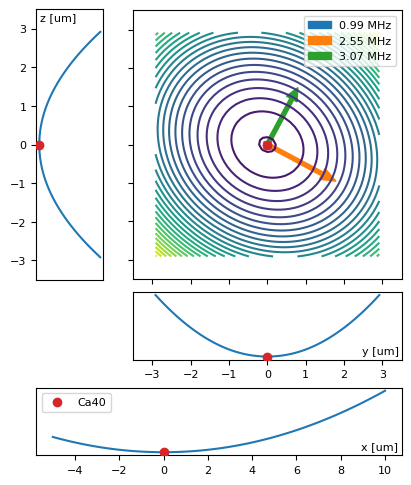

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from models.segmented_trap import SegmentedTrap
from models.segmented_trap.plot import plot_voltages_on_trap
from pytrans.analysis import analyse_potential
from pytrans.plotting.plotting import plot_potential_make_layout, plot_potential

from pytrans.ions import Ca40

trap = SegmentedTrap()
waveform = np.load(data_dir / 'waveform_static_segmented_trap.npy')

r0 = (0, 0, trap.z0)
roi = ((-5e-6, 10e-6), 3.5e-6, 3.5e-6)
res = analyse_potential(trap, voltages=waveform[0], ions=Ca40, r0=r0, roi=roi, verbose=False)
res


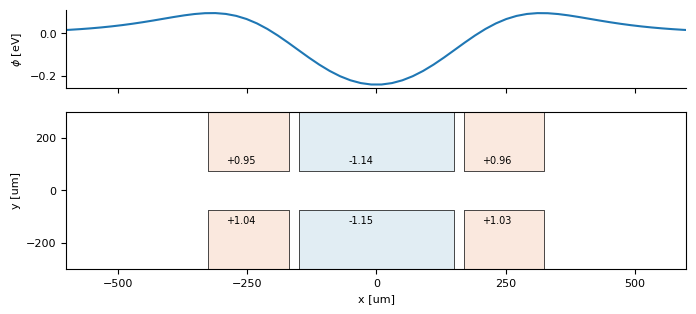

In [4]:
_ = plot_voltages_on_trap(trap, waveform[0])


## Mixed-species ion crystal

--------------
Trap potential analysis for ion Ca40: 
Equilibrium position [um]
[-0.0002 -0.0002 -0.0003]
Gradient [V/m]
[-0.0026 -0.0281 -0.0401]
Displacement at 1 MHz [um]
[-0.0002 -0.0017 -0.0025]
Hessian [V/m2]
[[ 1.6351e+07 -5.5219e+04  3.8897e+04]
 [-5.5219e+04  1.1724e+08  2.0000e+07]
 [ 3.8897e+04  2.0000e+07  1.4385e+08]]
Normal mode frequencies [MHz]
[0.999998 2.55236 3.07456]
Eigenvectors
[[1 0.000627 -0.000403]
 [-0.000744 0.881 -0.472]
 [5.94e-05 0.472 0.881]]
Tilt angle of mode 2 (3.07): 61.82°
--------------
Mode solver analysis for ion crystal [Be9, Ca40, Ca40, Be9]: 
Equilibrium positions [um]
[[-6.3864 -0.0038 -0.0462]
 [-2.0267 -0.0037  0.0088]
 [ 2.0084  0.0007  0.0069]
 [ 6.358  -0.0007 -0.0495]]
Normal modes
  Freq [MHz]                     Be9                               Ca40                               Ca40                                Be9
------------  ----------  ----------  ----------  ----------  ---------  ---------  ----------  ----------  --------- 

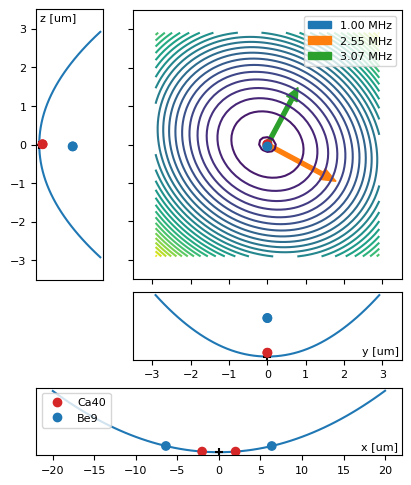

In [5]:
from pytrans.ions import Ca40, Be9
from pytrans.analysis import analyse_potential

r0 = (0, 0, trap.z0)
roi = (20e-6, 3.5e-6, 3.5e-6)

ions = [Be9, Ca40, Ca40, Be9]
res = analyse_potential(trap, voltages=waveform[0], ions=ions, ion1=Ca40, r0=r0, roi=roi, verbose=False)
res

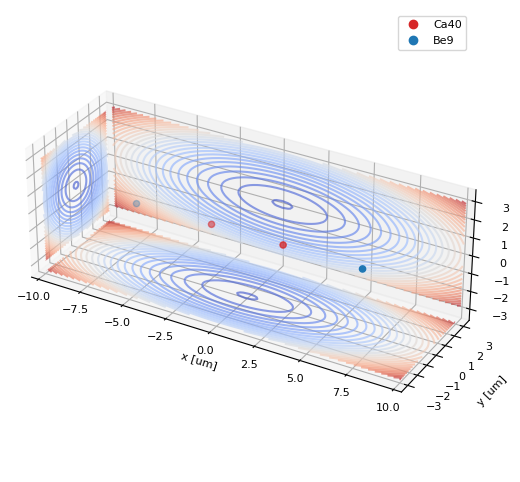

In [6]:
from pytrans.plotting import plot3d_potential

roi = (10e-6, 3.5e-6, 3.5e-6)
_ = plot3d_potential(trap, waveform[0], Ca40, r0, roi, analyse_results=res)